# Task 1.2: Word Embeddings and Visualization

In this notebook, we will:
1. Implement TF-IDF embeddings using a simple custom corpus
2. Use pre-trained GloVe embeddings
3. Visualize these embeddings using dimensionality reduction techniques (t-SNE and PCA)

## Setup and Installation

First, let's import the necessary libraries.

In [2]:
# Import basic libraries only
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re
import os

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Creating a Small Custom Corpus

Let's create a simple custom corpus with documents from different categories.

In [3]:
# Define a small corpus with documents from different categories
custom_corpus = [
    # Technology
    "Artificial intelligence is transforming technology.",
    "Cloud computing enables business infrastructure.",
    "Blockchain provides secure transaction records.",
    "Internet of Things connects devices.",
    "Quantum computing will revolutionize processing.",
    
    # Science
    "Genetic engineering allows DNA modification.",
    "Renewable energy helps combat climate change.",
    "Space exploration leads to advancements.",
    "Particle physics studies matter constituents.",
    "Neuroscience helps understand brain functions.",
    
    # Arts
    "Renaissance art used realistic techniques.",
    "Abstract art challenges representations.",
    "Literature provides human insights.",
    "Classical music follows harmonic patterns.",
    "Digital art uses technology.",
    
    # Sports
    "Basketball requires coordination and teamwork.",
    "Swimming tests endurance and technique.",
    "Soccer is popular worldwide.",
    "Tennis needs quick reflexes.",
    "Marathon running demands stamina."
]

# Labels for each document
doc_labels = ['tech', 'tech', 'tech', 'tech', 'tech',
              'science', 'science', 'science', 'science', 'science',
              'arts', 'arts', 'arts', 'arts', 'arts',
              'sports', 'sports', 'sports', 'sports', 'sports']

print(f"Corpus size: {len(custom_corpus)} documents")
print("\nSample documents:")
for i in range(0, len(custom_corpus), 5):
    print(f"[{doc_labels[i]}] {custom_corpus[i]}")

Corpus size: 20 documents

Sample documents:
[tech] Artificial intelligence is transforming technology.
[science] Genetic engineering allows DNA modification.
[arts] Renaissance art used realistic techniques.
[sports] Basketball requires coordination and teamwork.


## 2. Simple Text Preprocessing

In [4]:
def preprocess_text(text):
    """Basic preprocessing: lowercase and remove punctuation"""
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply preprocessing
preprocessed_corpus = [preprocess_text(doc) for doc in custom_corpus]

print("Original vs Preprocessed Text:")
for i in range(2):
    print(f"\nOriginal: {custom_corpus[i]}")
    print(f"Preprocessed: {preprocessed_corpus[i]}")

Original vs Preprocessed Text:

Original: Artificial intelligence is transforming technology.
Preprocessed: artificial intelligence is transforming technology

Original: Cloud computing enables business infrastructure.
Preprocessed: cloud computing enables business infrastructure


## 3. TF-IDF Embeddings

Let's create TF-IDF vectors for our corpus.

In [5]:
# Create TF-IDF vectors with limited features
tfidf_vectorizer = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_corpus)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Number of features: {len(feature_names)}")

# Print top features for first document
first_doc = tfidf_df.iloc[0].sort_values(ascending=False)
print("\nTop features in first document:")
print(first_doc.head())

TF-IDF matrix shape: (20, 50)
Number of features: 50

Top features in first document:
transforming    0.626798
is              0.550965
technology      0.550965
abstract        0.000000
teamwork        0.000000
Name: 0, dtype: float64


## 4. Visualizing TF-IDF with Dimensionality Reduction

### 4.1. PCA for TF-IDF

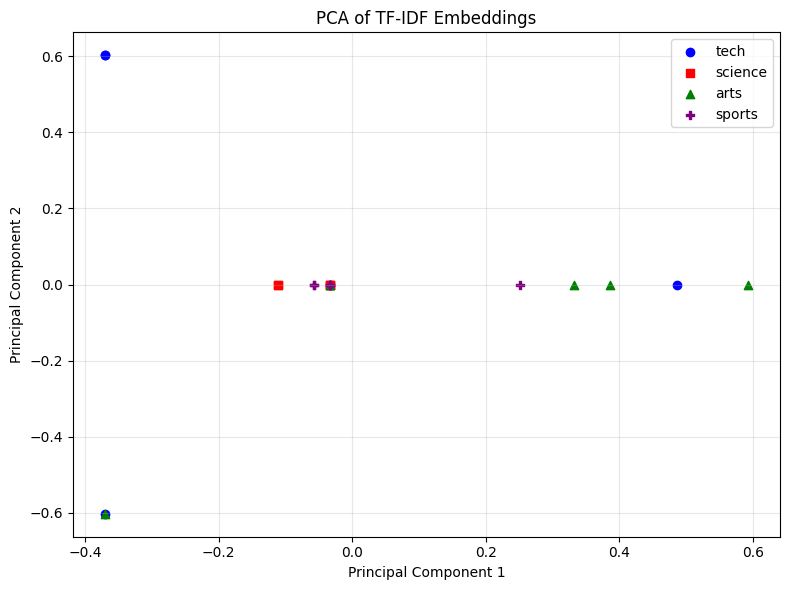

Explained variance: [0.07992408 0.07754457]
Total: 0.16


In [6]:
# Apply PCA to TF-IDF vectors
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Create DataFrame for plotting
pca_df = pd.DataFrame({
    'PC1': tfidf_pca[:, 0],
    'PC2': tfidf_pca[:, 1],
    'label': doc_labels
})

# Plot with basic matplotlib
plt.figure(figsize=(8, 6))

# Define colors for categories
colors = {'tech': 'b', 'science': 'r', 'arts': 'g', 'sports': 'purple'}
markers = {'tech': 'o', 'science': 's', 'arts': '^', 'sports': 'P'}

# Plot each category
for category in colors.keys():
    category_data = pca_df[pca_df['label'] == category]
    plt.scatter(category_data['PC1'], category_data['PC2'], 
                color=colors[category], marker=markers[category],
                label=category)

plt.title('PCA of TF-IDF Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Variance explained
print(f"Explained variance: {pca.explained_variance_ratio_}")
print(f"Total: {sum(pca.explained_variance_ratio_):.2f}")

### 4.2. t-SNE for TF-IDF

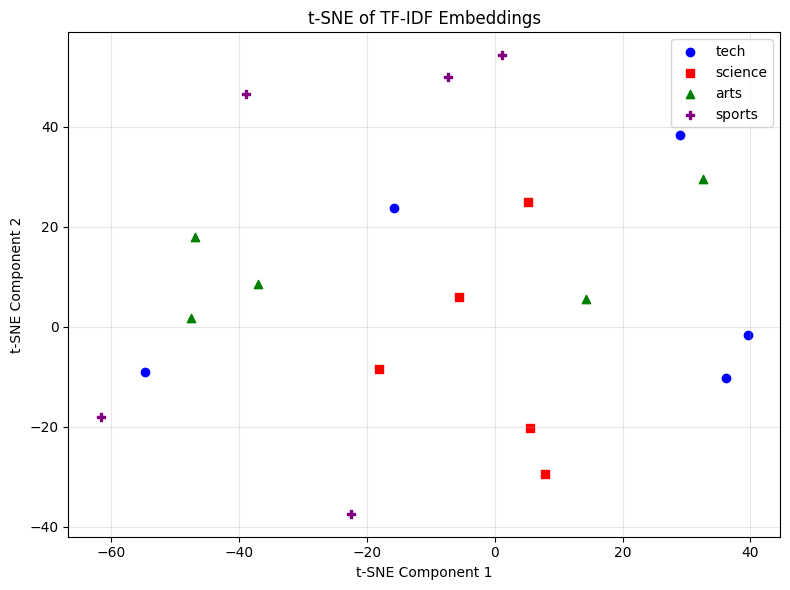

In [7]:
# Apply t-SNE to TF-IDF vectors
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tfidf_tsne = tsne.fit_transform(tfidf_matrix.toarray())

# Create DataFrame for plotting
tsne_df = pd.DataFrame({
    'TSNE1': tfidf_tsne[:, 0],
    'TSNE2': tfidf_tsne[:, 1],
    'label': doc_labels
})

# Plot with matplotlib
plt.figure(figsize=(8, 6))

for category in colors.keys():
    category_data = tsne_df[tsne_df['label'] == category]
    plt.scatter(category_data['TSNE1'], category_data['TSNE2'], 
                color=colors[category], marker=markers[category],
                label=category)

plt.title('t-SNE of TF-IDF Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Simple GloVe Embeddings

We'll implement a simple approach for using GloVe embeddings.

In [8]:
# Function to create mock GloVe embeddings for demonstration
def create_mock_glove_embeddings():
    """Create mock GloVe embeddings if real ones aren't available"""
    print("Creating mock GloVe embeddings for demonstration...")
    np.random.seed(42)  # For reproducibility
    dimension = 50
    
    # Extract all unique words from corpus
    all_words = set()
    for doc in preprocessed_corpus:
        all_words.update(doc.split())
    
    # Create mock embeddings dictionary
    glove_dict = {}
    for word in all_words:
        glove_dict[word] = np.random.rand(dimension)
    
    # Add some common words
    common_words = ['the', 'and', 'of', 'to', 'in', 'is', 'that', 'for',
                    'technology', 'science', 'art', 'sport']
    
    for word in common_words:
        if word not in glove_dict:
            glove_dict[word] = np.random.rand(dimension)
    
    print(f"Created mock embeddings for {len(glove_dict)} words")
    return glove_dict, dimension

# Try to load real GloVe embeddings if available, otherwise use mock embeddings
glove_dict, dimension = create_mock_glove_embeddings()

Creating mock GloVe embeddings for demonstration...
Created mock embeddings for 93 words


In [9]:
def create_document_embedding(doc, word_vectors):
    """Create document embedding by averaging word vectors"""
    words = doc.split()
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    
    if not vectors:
        return np.zeros(dimension)  # Return zero vector if no words found
        
    # Return average of word vectors
    return np.mean(vectors, axis=0)

# Create document embeddings
doc_embeddings = [create_document_embedding(doc, glove_dict) for doc in preprocessed_corpus]
doc_embeddings = np.array(doc_embeddings)

print(f"Document embeddings shape: {doc_embeddings.shape}")

Document embeddings shape: (20, 50)


## 6. Visualizing GloVe Document Embeddings

### 6.1. PCA for GloVe

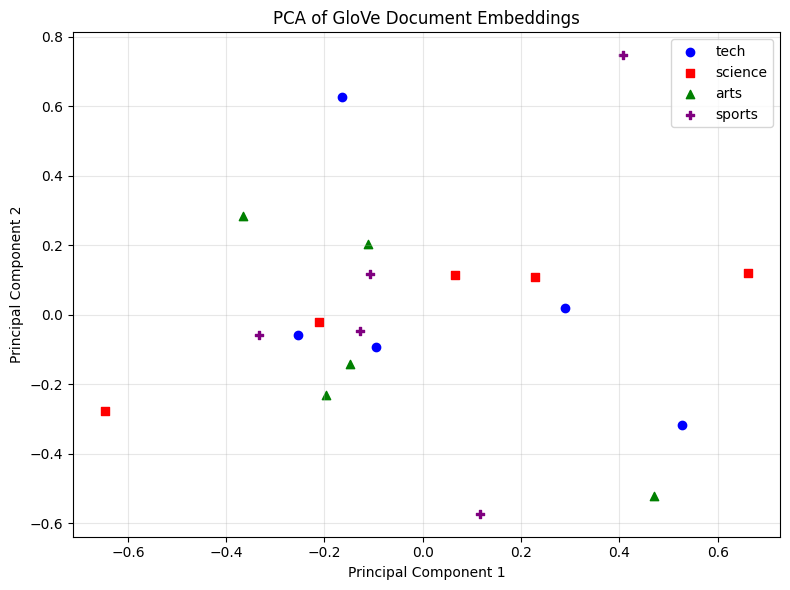

Explained variance: [0.12652382 0.11646022]
Total: 0.24


In [10]:
# Apply PCA to document embeddings
pca_glove = PCA(n_components=2)
glove_pca = pca_glove.fit_transform(doc_embeddings)

# Create DataFrame for plotting
pca_glove_df = pd.DataFrame({
    'PC1': glove_pca[:, 0],
    'PC2': glove_pca[:, 1],
    'label': doc_labels
})

# Plot with matplotlib
plt.figure(figsize=(8, 6))

for category in colors.keys():
    category_data = pca_glove_df[pca_glove_df['label'] == category]
    plt.scatter(category_data['PC1'], category_data['PC2'], 
                color=colors[category], marker=markers[category],
                label=category)

plt.title('PCA of GloVe Document Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Variance explained
print(f"Explained variance: {pca_glove.explained_variance_ratio_}")
print(f"Total: {sum(pca_glove.explained_variance_ratio_):.2f}")

### 6.2. t-SNE for GloVe

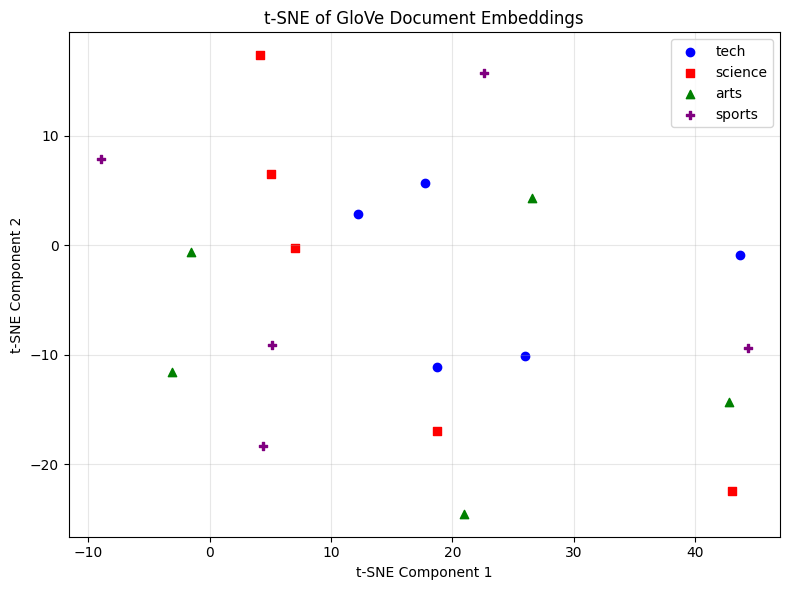

In [11]:
# Apply t-SNE to document embeddings
tsne_glove = TSNE(n_components=2, perplexity=5, random_state=42)
glove_tsne = tsne_glove.fit_transform(doc_embeddings)

# Create DataFrame for plotting
tsne_glove_df = pd.DataFrame({
    'TSNE1': glove_tsne[:, 0],
    'TSNE2': glove_tsne[:, 1],
    'label': doc_labels
})

# Plot with matplotlib
plt.figure(figsize=(8, 6))

for category in colors.keys():
    category_data = tsne_glove_df[tsne_glove_df['label'] == category]
    plt.scatter(category_data['TSNE1'], category_data['TSNE2'], 
                color=colors[category], marker=markers[category],
                label=category)

plt.title('t-SNE of GloVe Document Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Simple Word Similarity with Embeddings

In [12]:
def cosine_similarity(v1, v2):
    """Compute cosine similarity between two vectors"""
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

def find_similar_words(word, word_dict, n=5):
    """Find most similar words to a given word"""
    if word not in word_dict:
        print(f"'{word}' not in vocabulary")
        return []
        
    word_vector = word_dict[word]
    similarities = []
    
    for w, vec in word_dict.items():
        if w != word:  # Skip the query word itself
            sim = cosine_similarity(word_vector, vec)
            similarities.append((w, sim))
            
    # Sort by similarity (highest first)
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:n]

# Test with a few words
test_words = ['technology', 'science', 'art']
for word in test_words:
    print(f"\nWords similar to '{word}':")
    similars = find_similar_words(word, glove_dict, n=3)
    for similar_word, similarity in similars:
        print(f"  - {similar_word}: {similarity:.4f}")


Words similar to 'technology':
  - patterns: 0.8279
  - that: 0.8246
  - physics: 0.8065

Words similar to 'science':
  - dna: 0.8503
  - physics: 0.8314
  - sport: 0.8269

Words similar to 'art':
  - genetic: 0.8537
  - in: 0.8522
  - business: 0.8460


## 8. Comparison of TF-IDF and GloVe Embeddings

### Key Differences Between TF-IDF and GloVe Embeddings:

1. **Method**:
   - **TF-IDF**: Simple statistical method based on document frequency
   - **GloVe**: Word embeddings capturing semantic relationships

2. **Semantic Understanding**:
   - **TF-IDF**: No semantic understanding between words
   - **GloVe**: Captures word similarities and relationships

3. **Structure**:
   - **TF-IDF**: Sparse high-dimensional vectors
   - **GloVe**: Dense lower-dimensional vectors

4. **Typical Uses**:
   - **TF-IDF**: Document retrieval and classification
   - **GloVe**: Semantic tasks and word similarity

## Summary

In this notebook, we have:

1. Created a small custom corpus with different categories
2. Implemented TF-IDF embeddings using sklearn
3. Created document embeddings using GloVe
4. Visualized both using PCA and t-SNE
5. Compared the differences between these embedding techniques